# Networking Outer Detection - Isolation Forest
Link: [Anomaly Detection : Isolation Forest with Statistical Rules](https://towardsdatascience.com/isolation-forest-with-statistical-rules-4dd27dad2da9)

In [3]:
import pandas as pd
import numpy as np

In [4]:
full_df=pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv')
full_df.head()

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714


In [5]:
print(full_df['timestamp'].min())
print(full_df['timestamp'].max())
print(len(full_df['timestamp']))

2014-02-14 14:27:00
2014-02-28 14:22:00
4032


<AxesSubplot: >

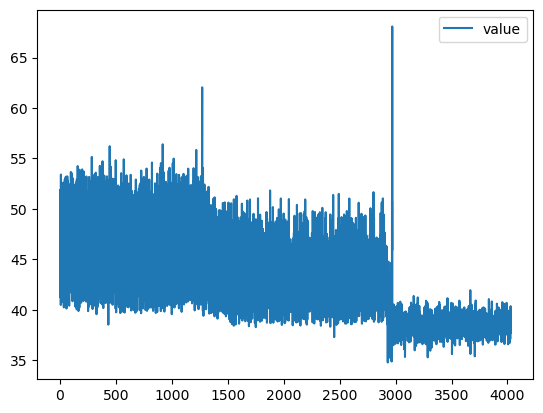

In [6]:
import matplotlib
import matplotlib.pyplot as plt
full_df.plot()

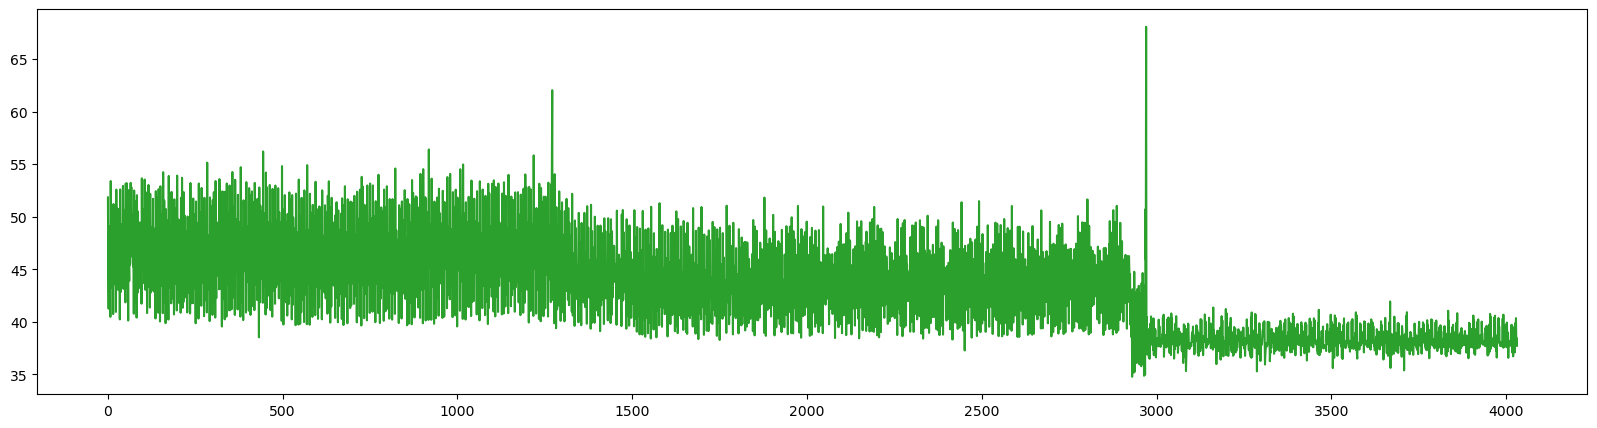

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(pd.Series(full_df['value']).sort_index(), color='tab:green')

In [14]:
df=full_df.loc[(full_df["timestamp"]>"2014-02-24 00:00:00") & (full_df["timestamp"] < "2014–02–24 23:59:59")]
df.head()

,timestamp,value
2707,2014-02-24 00:02:00,43.024
2708,2014-02-24 00:07:00,45.128
2709,2014-02-24 00:12:00,39.578
2710,2014-02-24 00:17:00,47.302
2711,2014-02-24 00:22:00,43.474


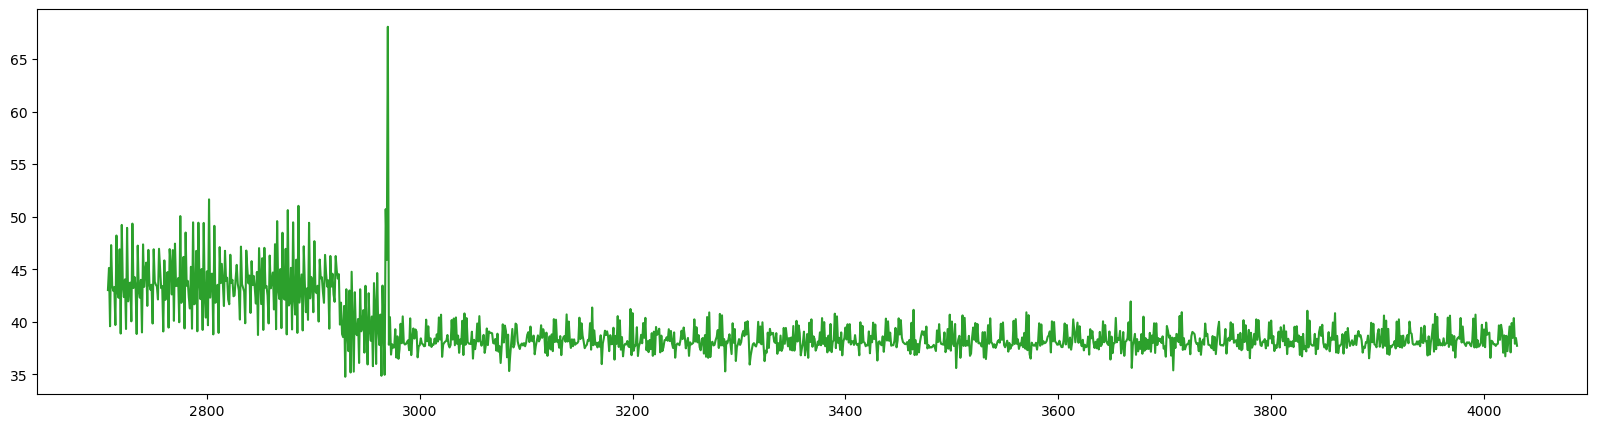

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(pd.Series(df['value']).sort_index(), color='tab:green')

## Running Isolation Forest

In [20]:
contamination = df['value'].sum()/len(df)
contamination                                   

39.24357735849057

In [28]:
contamination = 0.5

In [29]:
# Set tree parameters
num_trees = 200
shingle_size = 48
tree_size = 1000

from sklearn.ensemble import IsolationForest

In [30]:
IF = IsolationForest(n_estimators=num_trees,
                     contamination=contamination,
                     random_state=0)

In [32]:
IF.fit(df)

ValueError: could not convert string to float: '2014-02-24 00:02:00'

In [25]:

if_scores = IF.score_samples(points)
if_scores = pd.Series(-if_scores,
                      index=(taxi
                             .iloc[(shingle_size - 1):]
                             .index))

NameError: name 'points' is not defined

## Compare the model’s performance

In [ ]:
isolate-forest